# Detecting Contrails

In [ ]:
!pip install contrai==0.1.40

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Attempting uninstall: contrai
    Found existing installation: Contrai 0.1.38
    Uninstalling Contrai-0.1.38:
      Successfully uninstalled Contrai-0.1.38


In [2]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"  # JupyterLab
from pathlib import Path
import matplotlib.pyplot as plt
from contrai.utils.predict import predict



## 1. Select paths

In [3]:
YEAR = "2025"
MONTH = "04"
DAY = "03"
TIME = "1430"

In [4]:
from pathlib import Path

# Get current working directory
cwd = Path.cwd()

# Build paths relative to the current directory
from contrai.models.semantic_segmentation.coat.weight_loader import ensure_local_weight
from contrai.models.semantic_segmentation.coat.CoaT_U import CoaT_U

model = CoaT_U
model_path = ensure_local_weight("final")


image_path = cwd.parent / f"notebooks/images/goes16_ash_rgb/{YEAR}/{MONTH}/{DAY}/{TIME}/ash_rgb_0p02deg.png"
output_path = Path(str(image_path).replace("/images/", "/outputs/"))

# Safety checks
assert model_path.exists(), f"Model weights not found: {model_path}"
assert image_path.exists(), f"Image not found: {image_path}"

print("Using model:", model_path)


Using model: /home/irortiza/Documents/PUBLIC_GITHUB/ContrAI/notebooks/weights/final/coat_model.pth


## 2. Run detection

In [5]:
from contrai.data.goes16 import get_ash_rgb_pixel_geolocations
lat_grid, lon_grid = get_ash_rgb_pixel_geolocations(
)
geojson_fc = predict(model,
    model_path,
    image_path,
    product="geojson",
    lat=lat_grid,
    lon=lon_grid,
    coords=None,            # or (x1, x2, y1, y2) if cropped
    feature_id="contrail",
)


2025-11-18 21:35:03,113 | INFO | Using device: cuda
2025-11-18 21:35:03,114 | INFO | Loading model from /home/irortiza/Documents/PUBLIC_GITHUB/ContrAI/notebooks/weights/final/coat_model.pth
/home/irortiza/miniconda3/envs/contrai_env_test2/lib/python3.10/site-packages/contrai/models/semantic_segmentation/coat/CoaT_U.py:280: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recomm

_IncompatibleKeys(missing_keys=[], unexpected_keys=['norm1.weight', 'norm1.bias', 'norm2.weight', 'norm2.bias', 'norm3.weight', 'norm3.bias', 'norm4.weight', 'norm4.bias', 'aggregate.weight', 'aggregate.bias', 'head.weight', 'head.bias'])


In [6]:
import numpy as np
import plotly.graph_objects as go
from contrai.utils.plot import plot_contrails_plotly_geo_dark


fig = plot_contrails_plotly_geo_dark(
    geojson_fc,
    title="GOES-16 Contrail Detection",
    subtitle=f"Ash RGB scene • {YEAR}-{MONTH}-{DAY} {TIME[:2]}:{TIME[2:]} UTC",
)
fig.show(config={"scrollZoom": True})
fig.write_html("contrail_demo.html", include_plotlyjs="cdn", full_html=True)

In [12]:
feat = geojson_fc["features"][0]
coords = feat["geometry"]["coordinates"][0]  # first ring
print(coords[:5])


[[-79.55924, -12.539492], [-79.55924, -12.4995], [-79.49925, -12.4995], [-79.479253, -12.479504], [-79.37927, -12.479504]]


In [18]:
mask = predict(model,model_path, image_path, product="mask")


2025-11-18 19:47:39,855 | INFO | Using device: cuda
2025-11-18 19:47:39,859 | INFO | Loading model from /home/irortiza/Documents/PUBLIC_GITHUB/ContrAI/notebooks/weights/final/coat_model.pth
/home/irortiza/miniconda3/envs/contrai_env_test2/lib/python3.10/site-packages/contrai/models/semantic_segmentation/coat/CoaT_U.py:115: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recomm

_IncompatibleKeys(missing_keys=[], unexpected_keys=['norm1.weight', 'norm1.bias', 'norm2.weight', 'norm2.bias', 'norm3.weight', 'norm3.bias', 'norm4.weight', 'norm4.bias', 'aggregate.weight', 'aggregate.bias', 'head.weight', 'head.bias'])


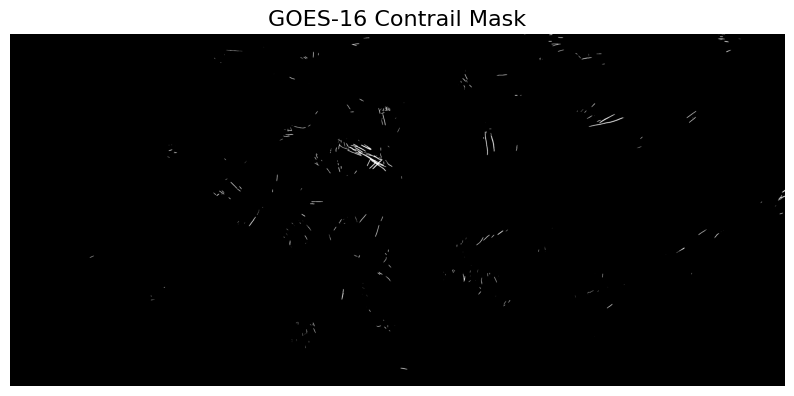

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(mask, cmap="gray")
ax.set_title("GOES-16 Contrail Mask", fontsize=16)
ax.axis("off")

plt.show()



In [4]:
overlay = predict(model,model_path, image_path, product="overlay")

2025-11-18 20:39:30,510 | INFO | Using device: cuda
2025-11-18 20:39:30,511 | INFO | Loading model from /home/irortiza/Documents/PUBLIC_GITHUB/ContrAI/notebooks/weights/final/coat_model.pth
/home/irortiza/miniconda3/envs/contrai_env_test2/lib/python3.10/site-packages/contrai/models/semantic_segmentation/coat/CoaT_U.py:115: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recomm

_IncompatibleKeys(missing_keys=[], unexpected_keys=['norm1.weight', 'norm1.bias', 'norm2.weight', 'norm2.bias', 'norm3.weight', 'norm3.bias', 'norm4.weight', 'norm4.bias', 'aggregate.weight', 'aggregate.bias', 'head.weight', 'head.bias'])


/home/irortiza/miniconda3/envs/contrai_env_test2/lib/python3.10/site-packages/contrai/utils/predict.py:64: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

2025-11-18 20:39:31,

## 3. Visualize

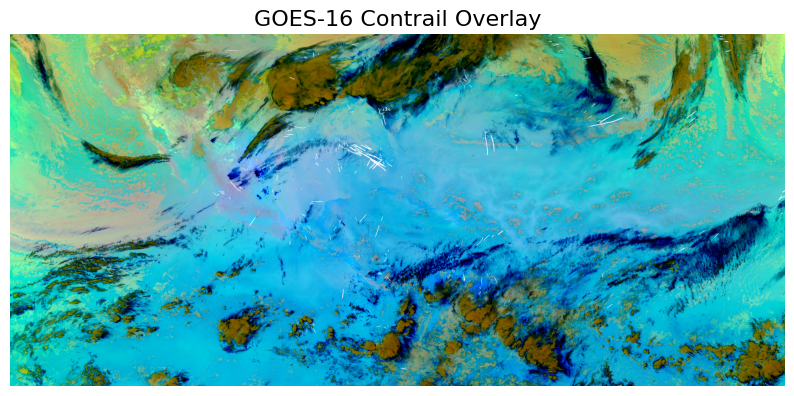

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(overlay)
ax.set_title("GOES-16 Contrail Overlay", fontsize=16)
ax.axis("off")

plt.show()


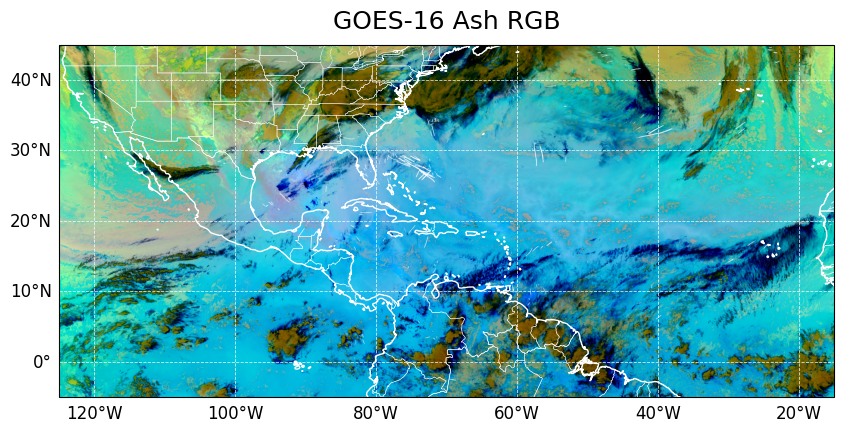

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from contrai.data.goes16 import get_ash_rgb_pixel_geolocations
import numpy as np
# lat/lon grids (same shape as RGB image)

lat_bounds = (-5.0, 45.0)
lon_bounds = (-125.0, -15.0)
res_deg = 0.02
lat_grid, lon_grid = get_ash_rgb_pixel_geolocations(
    res_deg=res_deg,lat_bounds=lat_bounds,lon_bounds=lon_bounds
)

# The projection for Ash RGB output
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=proj)

# Set extent to exact Ash RGB region
lat_min, lat_max = lat_grid.min(), lat_grid.max()
lon_min, lon_max = lon_grid.min(), lon_grid.max()
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

# Plot RGB image
ax.imshow(
    overlay,
    extent=[lon_min, lon_max, lat_min, lat_max],  # map extent
    transform=proj,
    origin='upper'
)

# ---- Add cartographic features ----
ax.coastlines(resolution="50m", linewidth=1.0, color="white")
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="white")
ax.add_feature(cfeature.STATES.with_scale("50m"), linewidth=0.3, edgecolor="white")

# ---- Gridlines ----
gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.6,
    color='white',
    alpha=0.8,
    linestyle='--'
)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {"size": 12}
gl.ylabel_style = {"size": 12}

# ---- Title ----
ax.set_title("GOES-16 Ash RGB", fontsize=18, pad=12)

plt.show()

In [9]:

from contrai.utils.plot import plot_overlay_interactive_light
plot_overlay_interactive_light(overlay, title="GOES-16 Contrail Overlay")